# Clean And Analyze Employee Exit Surveys  
In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [54]:
tafe_survey['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      360
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [6]:
tafe_survey.shape

(702, 72)

In [7]:
dete_survey['Age'].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

In [8]:
dete_survey.isnull()


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
5,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,True,True,True,True
6,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
7,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,True,True,True,True,True
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
9,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True


In [9]:
dete_survey.shape

(822, 56)

In [10]:
tafe_survey.shape

(702, 72)

In [11]:
tafe_survey['Institute'].value_counts()

Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
Metropolitan South Institute of TAFE       1
The Bremer Institute of TAFE               1
Name: Institute, dtype: int64

The last 4 columns of dete_survey are entirely made of missing values. The majority of the responders are over 61 years old, so the primary reason for leaving is retirement. There is only one person younger than 20. In dete_survey, there are 822 rows and 56 columns. In tafe_survey there are 702 rows and 72 columns. Most of the responders from tafe_survey are from the 3 institutions: Brisbane North Institute of TAFE, Southern Queensland Institute of TAFE, Central Queensland Institute of TAFE.

**Identify Missing Values and Drop Unnecessary Columns**  
Below I am going to remove columns that are not necessary for my analysis.

In [12]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [13]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [14]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [15]:
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


**Clean Column Names**  
Since both of our datasets have the same columns but with titles differently, I will rename the columns to make them uniform across both datasets.

In [16]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [17]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [18]:
columns = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 
'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(columns, axis=1)

In [19]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

**Filter the Data**  
I will only pick 'Resignation' to analyze. Dete survey has 3 resignation columns and all 3 of them need to be selected. So I will change their titles to 'Resignation' and remove the rest of the string. Both dataframes are assigned to new variables by copying in order to avoid a 'SettingWithCopyWarning'.

In [20]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [21]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [22]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

In [23]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [24]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


In [25]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


**Verify the Data**

In [26]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [27]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [28]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [29]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [30]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

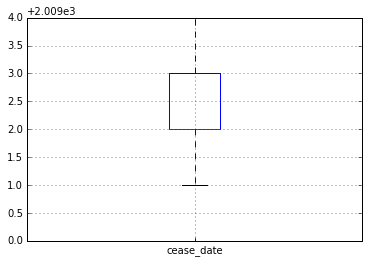

In [31]:
tafe_cease = ['cease_date']
boxplot = tafe_resignations[tafe_cease].boxplot()


**Create a New Column**

Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

    *Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?*
    
You may have noticed that the ```tafe_resignations``` dataframe already contains a "service" column, which we renamed to ```institute_service```. In order to analyze both surveys together, we'll have to create a corresponding ```institute_service``` column in ```dete_resignations``` by subtracting ```dete_start_date``` column from ```cease_date``` column. ```institute_service``` column will be used to analyze survey respondents according to their length of employment.

In [32]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [33]:
dete_resignations['institute_service'].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

**Identify Dissatisfied Employees**  

Next, I will identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. If the employee indicated any of the factors above caused them to resign, I will mark them as dissatisfied in a new column.     

*tafe_survey_updated:*  
    -Contributing Factors. Dissatisfaction  
    -Contributing Factors. Job Dissatisfaction    
    
*dafe_survey_updated:*  
    -job_dissatisfaction   
    -dissatisfaction_with_the_department   
    -physical_work_environment
    -lack_of_recognition 
    -lack_of_job_security  
    -work_location
    -employment_conditions  
    -work_life_balance 
    -workload  

In [37]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [38]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [42]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val== '-':
        return False
    return True

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)

In [44]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [49]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security',  'work_location',  'employment_conditions',  'work_life_balance', 'workload']].any(axis=1, skipna=False)

In [50]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [51]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

**Combine the Data**

In [55]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [63]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

combined

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1998.0,Resignation,NaN,False,NaN,False,False,False,False
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2010.0,Resignation,NaN,False,NaN,False,False,False,False
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Resignation,NaN,False,NaN,False,False,False,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1982.0,Resignation,NaN,False,NaN,False,False,False,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False


In [64]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [68]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [69]:
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

**Clean the Service Column**  
I'll have to clean up the institute_service column. This column is tricky to clean because it currently contains values in a couple different forms. I'll base our anlaysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective. To analyze the data, I'll convert these numbers into categories.    

I'll use the slightly modified definitions below:  

-New: Less than 3 years at a company   
-Experienced: 3-6 years at a company  
-Established: 7-10 years at a company  
-Veteran: 11 or more years at a company  

In [77]:
combined_updated['institute_service'].value_counts(dropna=False)



NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
14.0                   6
12.0                   6
17.0                   6
22.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [81]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype(str).str.extract(r'(\d+)') 

combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype(float)



/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [82]:
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [88]:
def year_cat(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val >= 3 and val <=6:
        return 'Experienced'
    elif val >=7 and val <= 10:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(year_cat)

In [89]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

**Perform Initial Analysis**

In [91]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [92]:
#replace the missing values in the dissatisfied column with the value that occurs the most frequently in this column (False).
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [93]:
dissatisfied = combined_updated.pivot_table(values='dissatisfied', index='service_cat')

In [94]:
dissatisfied

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


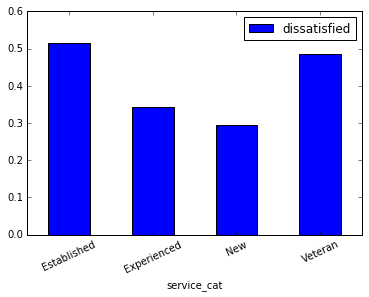

In [96]:
dissatisfied.plot(kind='bar', rot=25)

From the bar chart above we see that the established employees (7-10 years of service) and the veterans (11 or more years) are more likely to leave the job due to some kind of dissatisfaction.

In [97]:
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [98]:
combined_updated['age'] = combined_updated['age'].astype(str).str.extract(r'(\d+)') 

combined_updated['age'] = combined_updated['age'].astype(float)



/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [101]:
combined_updated['age'].value_counts(dropna=False).sort_index(ascending=True)

 20.0    10
 21.0    62
 26.0    67
 31.0    61
 36.0    73
 41.0    93
 46.0    81
 51.0    71
 56.0    55
 61.0    23
NaN      55
Name: age, dtype: int64

In [107]:
def age_cat(val):
    if pd.isnull(val):
        return np.nan
    elif val < 20:
        return 'New'
    elif val >= 20 and val <=31:
        return 'Early Career'
    elif val >=36 and val <= 46:
        return 'Mid-Career'
    elif val >= 51:
        return 'Late Career'
    
combined_updated['age_cat'] = combined_updated['age'].apply(age_cat)

In [108]:
dissatisfied_age = combined_updated.pivot_table(values='dissatisfied', index='age_cat')

In [109]:
dissatisfied_age

,dissatisfied
age_cat,
Early Career,0.360000
Late Career,0.422819
Mid-Career,0.368421


In [116]:
combined_updated['age_cat'].value_counts(dropna=False)

Mid-Career      247
Early Career    200
Late Career     149
NaN              55
Name: age_cat, dtype: int64

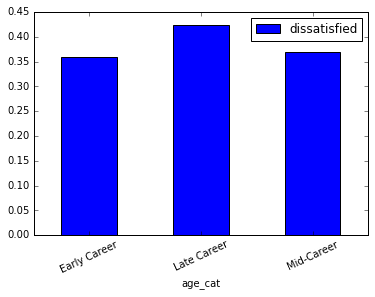

In [113]:
dissatisfied_age.plot(kind='bar', rot=25)

Most dissatisfied employees, who leave, are in the late career stage between the ages of 51 and 61.

In this guided project, I experienced that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. In order to create one visualization (and not even the final one), I completed the following tasks:  

-Explored the data and figured out how to prepare it for analysis  
-Corrected some of the missing values  
-Dropped any data not needed for our analysis  
-Renamed our columns  
-Verified the quality of our data  
-Created a new institute_service column  
-Cleaned the Contributing Factors columns    
-Created a new column indicating if an employee resigned because they were dissatisfied in some way   
-Combined the data    
-Cleaned the institute_service column    
-Handled the missing values in the dissatisfied column  
-Aggregated the data